In [8]:
from google.colab import files
import pandas as pd

# Upload the file
uploaded = files.upload()

# Skip the first 2 rows and load the data
stock_data = pd.read_csv('stock_data.csv', skiprows=2, parse_dates=['Date'])

# Set the correct column names
stock_data.columns = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume',
                      'MA_20', 'MA_50', 'RSI', 'MACD', 'Signal_Line', 'Returns']

# Set 'Date' as the index
stock_data.set_index('Date', inplace=True)

# Preview the DataFrame
stock_data.head()


Saving stock_data.csv to stock_data (7).csv


,Close,High,Low,Open,Volume,MA_20,MA_50,RSI,MACD,Signal_Line,Returns
Date,,,,,,,,,,,
2020-01-02,72.796036,72.856628,71.545402,71.799888,135480400,NaN,NaN,NaN,0.000000,0.000000,NaN
2020-01-03,72.088295,72.851761,71.862892,72.020432,146322800,NaN,NaN,NaN,-0.056458,-0.011292,-0.009722
2020-01-06,72.662712,72.701492,70.954002,71.206070,118387200,NaN,NaN,NaN,-0.054226,-0.019878,0.007968
2020-01-07,72.320961,72.929306,72.100403,72.672394,108872000,NaN,NaN,NaN,-0.079121,-0.031727,-0.004703
2020-01-08,73.484383,73.787346,72.022887,72.022887,132079200,NaN,NaN,NaN,-0.004915,-0.026365,0.016087


In [9]:
# Create the target variable: 1 if the price goes up the next day, 0 otherwise
stock_data['Price_Up'] = (stock_data['Close'].shift(-1) > stock_data['Close']).astype(int)

# Drop the last row since it doesn't have a target value
stock_data.dropna(inplace=True)

# Preview the data
stock_data.head()


,Close,High,Low,Open,Volume,MA_20,MA_50,RSI,MACD,Signal_Line,Returns,Price_Up
Date,,,,,,,,,,,,
2020-03-13,67.531662,68.005409,61.453155,64.353933,370732000,71.094089,74.204476,45.068575,-2.659555,-2.035598,0.119808,0
2020-03-16,58.843910,62.942401,58.306998,58.780742,322423600,70.089022,73.925433,40.052929,-3.223397,-2.273158,-0.128647,1
2020-03-17,61.431286,62.585275,57.918287,60.131524,324056000,69.285600,73.712293,41.593076,-3.422020,-2.502930,0.043970,0
2020-03-18,59.927456,60.736466,57.607322,58.251131,300233600,68.350867,73.457588,43.998943,-3.658602,-2.734065,-0.024480,0
2020-03-19,59.468285,61.426428,58.941093,60.102373,271857200,67.433504,73.200535,43.661279,-3.838894,-2.955031,-0.007662,0


In [10]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X = stock_data[['Close', 'High', 'Low', 'Open', 'Volume', 'MA_20', 'MA_50', 'RSI', 'MACD', 'Signal_Line', 'Returns']]
y = stock_data['Price_Up']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [11]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
model = RandomForestClassifier(random_state=42, n_estimators=100)

# Train the model
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Make predictions
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Compute metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Print metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"ROC-AUC: {roc_auc:.2f}")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.40
Precision: 0.41
Recall: 0.40
F1-Score: 0.41
ROC-AUC: 0.45
Confusion Matrix:
[[28 41]
 [44 29]]


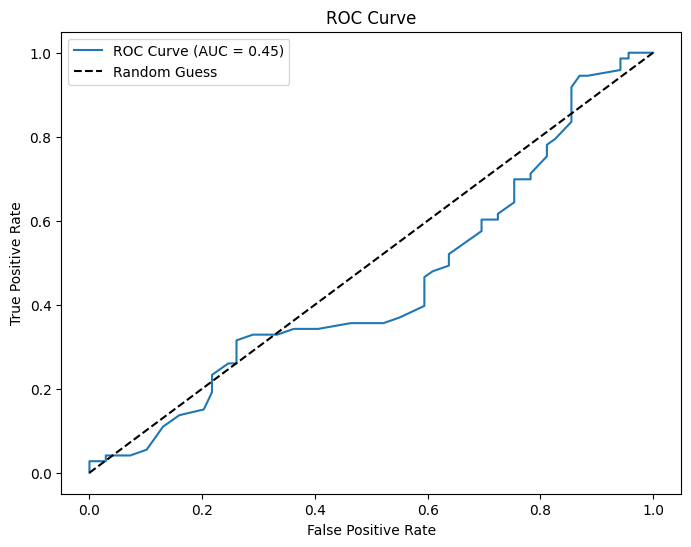

In [13]:
# Plot the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()
